# Data Exploration

In this notebook, we will explore the dataset used for fine-tuning the BAAI/bge-large-en-v1.5 model with LoRA. We will visualize the distributions of different educational background groups and analyze the dataset for any imbalances.

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_from_disk

# Set visualization style
sns.set(style='whitegrid')

/opt/homebrew/Caskroom/miniconda/base/envs/ml-env/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [3]:
# Load the dataset from HuggingFace format
dataset_path = 'data/processed/processed_resume_dataset'
dataset_dict = load_from_disk(dataset_path)

# Get train dataset as pandas DataFrame
dataset = dataset_dict['train'].to_pandas()

print(f"Dataset loaded: {len(dataset)} samples")
print(f"\nColumns: {list(dataset.columns)}")
print(f"\nSchool categories distribution:")
print(dataset['school_category'].value_counts())

# Display the first few rows
dataset.head()

Dataset loaded: 6241 samples

Columns: ['resume_text', 'job_description_text', 'label', 'is_top_school', 'school_category']

School categories distribution:
school_category
non_top_school         4960
no_school_mentioned    1029
top_school              252
Name: count, dtype: int64


,resume_text,job_description_text,label,is_top_school,school_category
0,SummaryHighly motivated Sales Associate with e...,Net2Source Inc. is an award-winning total work...,No Fit,False,non_top_school
1,Professional SummaryCurrently working with Cat...,At Salas OBrien we tell our clients that were ...,No Fit,False,non_top_school
2,SummaryI started my construction career in Jun...,Schweitzer Engineering Laboratories (SEL) Infr...,No Fit,False,non_top_school
3,SummaryCertified Electrical Foremanwith thirte...,"Mizick Miller & Company, Inc. is looking for a...",No Fit,False,non_top_school
4,SummaryWith extensive experience in business/r...,Life at Capgemini\nCapgemini supports all aspe...,No Fit,False,non_top_school


/var/folders/hw/l928q0n93772gs857sdvdsn40000gn/T/ipykernel_28087/1927281746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='school_category', palette='viridis')


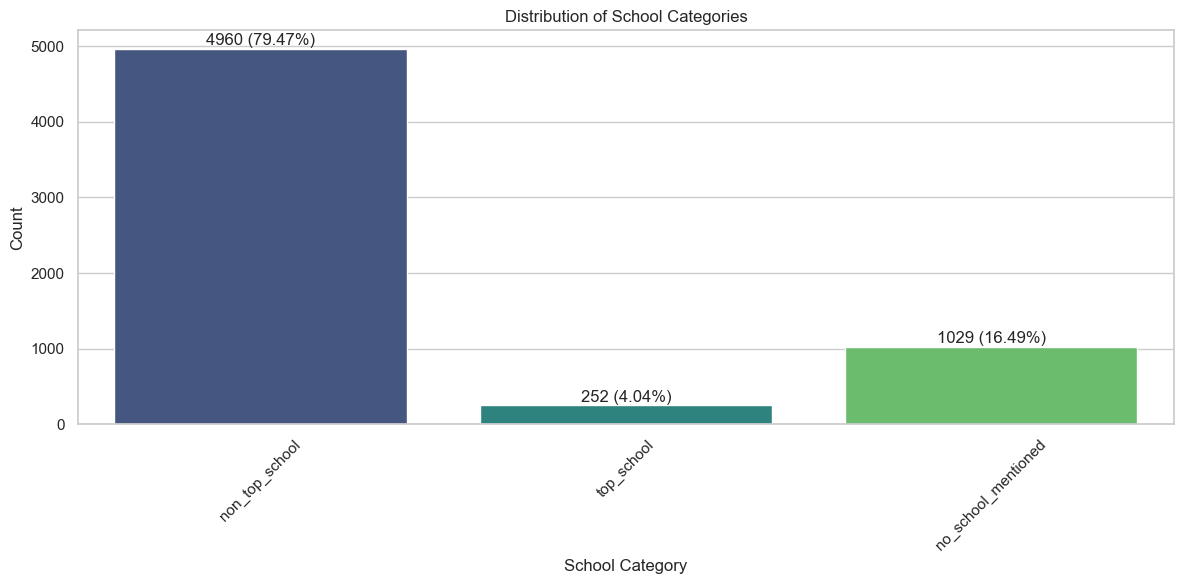

In [4]:
# Visualize the distribution of school categories
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='school_category', palette='viridis')
plt.title('Distribution of School Categories')
plt.xlabel('School Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add count labels on bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10,
            f'{int(height)} ({100*height/len(dataset):.2f}%)',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [5]:
# Analyze the balance of the dataset
school_counts = dataset['school_category'].value_counts(normalize=True)
print('Proportions of School Categories:')
print(school_counts)
print(f"\nTotal samples: {len(dataset)}")

# Check label distribution
label_counts = dataset['label'].value_counts()
print('\n📊 Label Distribution:')
print(label_counts)
print(f"Match rate: {100 * label_counts[1] / len(dataset):.2f}%")

# Check for any imbalances in school categories
imbalanced_groups = school_counts[school_counts < 0.05]  # Threshold for imbalance (5%)
if not imbalanced_groups.empty:
    print('\n⚠️  Imbalanced school categories detected (< 5%):')
    print(imbalanced_groups)
else:
    print('\n✅  No significant imbalances detected.')

# Check if top school is minority
top_school_ratio = dataset['is_top_school'].mean()
print(f'\n🎓 Top school ratio: {100 * top_school_ratio:.2f}%')

Proportions of School Categories:
school_category
non_top_school         0.794744
no_school_mentioned    0.164877
top_school             0.040378
Name: proportion, dtype: float64

Total samples: 6241

📊 Label Distribution:
label
No Fit           3143
Potential Fit    1556
Good Fit         1542
Name: count, dtype: int64
Match rate: 24.93%

⚠️  Imbalanced school categories detected (< 5%):
school_category
top_school    0.040378
Name: proportion, dtype: float64

🎓 Top school ratio: 4.04%


/var/folders/hw/l928q0n93772gs857sdvdsn40000gn/T/ipykernel_28087/956746079.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Match rate: {100 * label_counts[1] / len(dataset):.2f}%")


In [6]:
# Save the exploration results for future reference
import json

exploration_results = {
    'total_samples': len(dataset),
    'school_category_counts': school_counts.to_dict(),
    'label_counts': label_counts.to_dict(),
    'top_school_ratio': float(top_school_ratio),
    'match_rate': float(label_counts[1] / len(dataset)),
    'imbalanced_groups': imbalanced_groups.to_dict() if not imbalanced_groups.empty else None,
    'columns': list(dataset.columns)
}

output_path = 'data/processed/exploration_results.json'
with open(output_path, 'w') as f:
    json.dump(exploration_results, f, indent=2)

print(f'✅ Exploration results saved to: {output_path}')
print(f'\n📊 Summary:')
print(f'   Total samples: {len(dataset)}')
print(f'   Top school ratio: {100 * top_school_ratio:.2f}%')
print(f'   Match rate: {100 * label_counts[1] / len(dataset):.2f}%')

✅ Exploration results saved to: data/processed/exploration_results.json

📊 Summary:
   Total samples: 6241
   Top school ratio: 4.04%
   Match rate: 24.93%


/var/folders/hw/l928q0n93772gs857sdvdsn40000gn/T/ipykernel_28087/2185991074.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'match_rate': float(label_counts[1] / len(dataset)),
/var/folders/hw/l928q0n93772gs857sdvdsn40000gn/T/ipykernel_28087/2185991074.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'   Match rate: {100 * label_counts[1] / len(dataset):.2f}%')
